# Conjugate Gradient Method

## Ejemplo: 
$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right]
$

Las ecuaciones de las rectas se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use(['seaborn'])
mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.titlecolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['scatter.edgecolors'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.edgecolor'] = 'black'

[-1.         -0.44444444  0.11111111  0.66666667  1.22222222  1.77777778
  2.33333333  2.88888889  3.44444444  4.        ] [ 2.5         1.66666667  0.83333333  0.         -0.83333333 -1.66666667
 -2.5        -3.33333333 -4.16666667 -5.        ]
Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema:  [ 2. -2.]


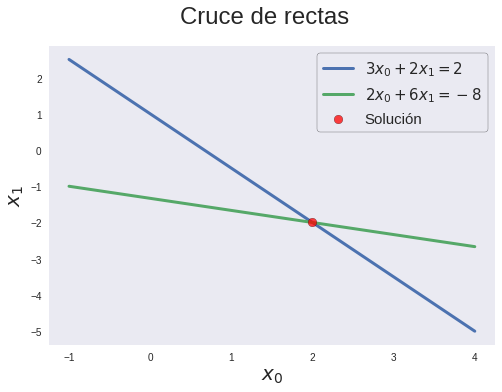

In [30]:
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6
x = np.linspace(-1,4,10)
y0 = m0 * x + b0
y1 = m1 * x + b1 

A = np.matrix([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema: ", sol)

plt.plot(x,y0,lw=3,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,lw=3,label = '$2x_0+6x_1=-8$')
plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas')
plt.grid(color='white')
plt.legend()

# Forma cuadrática

$ f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c $

$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
x =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
b =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
c =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$

$ f^\prime(x) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $

- Cuando $A$ es simétrica: $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(x)$ se obtiene cuando $ f^\prime(x) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$


In [28]:
def f(A,b,x,c):
    return 0.5 * (x.T * A * x) - b.T * x + c
    
size_grid = 30

x1 = np.linspace(-3,6,size_grid)
y1 = np.linspace(-6,3,size_grid)

xg,yg = np.meshgrid(x1,y1)
z = np.zeros((size_grid, size_grid))

for i in range(size_grid):
    for j in range(size_grid):
        xc = np.matrix([[xg[i,j]],[yg[i,j]]])
        z[i,j] = f(A,b,xc,0)

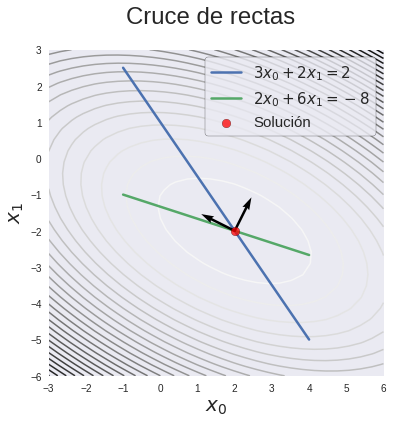

In [32]:
def dibujaContornosf(xg,yg,z):
    fig = plt.figure(figsize=(6,6))
    cont = plt.contour(xg,yg,z,30,cmap='binary')
    
def dibujaEigen():
    xv,yv = np.meshgrid([2,2],[-2,-2])
    u = np.array([1,-2, 0, 0])
    v = np.array([2, 1, 0, 0])
    vec = plt.quiver(xv,yv,u,v,scale=20, zorder=5)

def dibujaPasos(xi, sol, pasos):
    pasos = np.matrix(pasos)
    plt.plot(pasos[:,0],pasos[:,1],'-')
    plt.scatter(xi[0], xi[1], c='yellow', s = 75, alpha=0.75, zorder=5, label='Solución')
    plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')

dibujaContornosf(xg,yg,z)
dibujaEigen()

plt.plot(x,y0, '-', lw=2.5, label = '$3x_0+2x_1=2$')
plt.plot(x,y1, '-', lw=2.5, label = '$2x_0+6x_1=-8$')
plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas')
plt.grid(color='white')
plt.legend()

# Steepest Descent Method

In [33]:
def steepest(A,b,x,tol,kmax):
    steps = [[x[0,0], x[1,0]]]
    r = b - A * x
    res = np.linalg.norm(r)
    k = 0
    while(res > tol and k < kmax):
        alpha = r.T * r / (r.T * A * r)
        x = x + r * alpha
        steps.append([x[0,0],x[1,0]])
        r = b - A * x
        res = np.linalg.norm(r)
        k += 1
        print(k, res)
    return x, steps

b = np.matrix([[2.0],[-8.0]])
xini = np.matrix([[-2.0],[-2.0]])
tol = 0.001
kmax = 20

xs, pasos = steepest(A,b,xini,tol,kmax)

1 5.384289904692891
2 3.5895266031285917
3 1.3400899318346766
4 0.8933932878897847
5 0.3335334941455197
6 0.22235566276367916
7 0.08301278076510733
8 0.055341853843404884
9 0.0206609587682041
10 0.013773972512135697
11 0.00514228307119734
12 0.0034281887141298767
13 0.001279857119940566
14 0.00085323807996087


In [34]:
xs

matrix([[ 1.99976335],
        [-2.        ]])

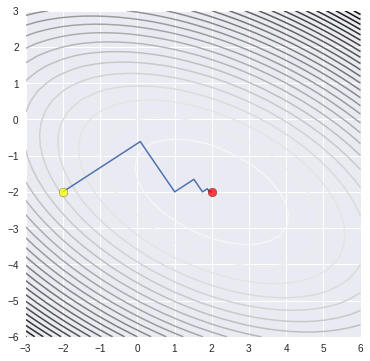

In [35]:
dibujaContornosf(xg,yg,z)
dibujaPasos([xini[0,0], xini[1,0]],
            [xs[0,0], xs[1,0]],
            pasos)

In [43]:
xs = np.copy(xini)
pasos = [(-2, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * xs
print(type(A))
print(type(xs))
print(A*xs)
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    xs = xs + alpha * d
    pasos.append((xs[0, 0], xs[1, 0]))
    r = b - A * xs
    res = np.linalg.norm(r)
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1
    print(i, res)

<class 'numpy.matrix'>
<class 'numpy.ndarray'>
[[-10.]
 [-16.]]
1 5.384289904692891
2 0.0


In [37]:
xs

matrix([[ 2.],
        [-2.]])

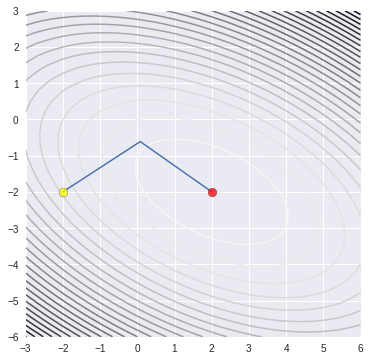

In [38]:
dibujaContornosf(xg,yg,z)
dibujaPasos([xini[0,0], xini[1,0]],
            [xs[0,0], xs[1,0]],
            pasos)